# 5. Predicting Customer Satisfaction Using Logistic Regression.

Importing the libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [2]:
data = pd.read_csv('./datasets/airline_customer_satisfaction.csv')

In [3]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Data Preprocessing

Define categorical and numerical columns

In [4]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numerical_cols = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 
                   'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 
                   'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 
                   'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 
                   'Departure Delay in Minutes', 'Arrival Delay in Minutes']

Preprocessing pipeline for numerical data

In [5]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Preprocessing pipeline for categorical data

In [6]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Combine preprocessing steps

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Apply transformations to the data

In [8]:
X = data.drop('satisfaction', axis=1)
y = data['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)  # Convert to binary target

X_preprocessed = preprocessor.fit_transform(X)

# Implement Logistic Regression

Split the dataset into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

Train the logistic regression model

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Evaluate the model

Predict on the test set

In [11]:
y_pred = model.predict(X_test)

Calculating accuracy

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


Generating confusion matrix

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

Plotting confusion matrix

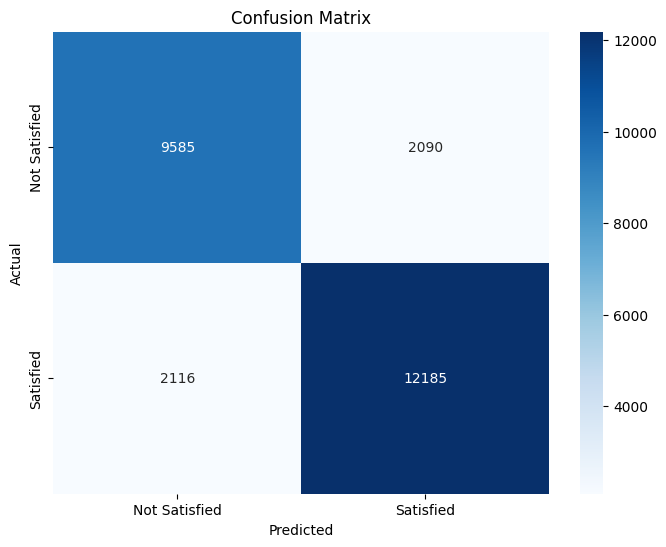

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()